In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Read the Q-table from the txt file into a DataFrame
qtable_df = pd.read_csv("../results/V4_version/V4_1_Qtable_160_100.txt", header=None, sep=" ")
qtable_df.columns = ["up", "down", "left", "right"]
qtable_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   up      160 non-null    float64
 1   down    160 non-null    float64
 2   left    160 non-null    float64
 3   right   160 non-null    float64
dtypes: float64(4)
memory usage: 5.1 KB


In [8]:
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]) # array con todas las celdas
number_of_columns = 3

def get_neighbor_indices(cell_index: int) -> np.ndarray:
    """Get the valid actions for the agent. The agent can only move to the neighbors of the selected cell."""
    cell_row = cell_index // number_of_columns
    cell_col = cell_index % number_of_columns
    above_idx = (cell_row - 1) * number_of_columns + cell_col
    below_idx = (cell_row + 1) * number_of_columns + cell_col
    left_idx = cell_row * number_of_columns + (cell_col - 1)
    right_idx = cell_row * number_of_columns + (cell_col + 1)

    neighbor_indices = [above_idx, below_idx, left_idx, right_idx]

    for i, idx in enumerate(neighbor_indices.copy()):
        # Check if index is within valid range
        if idx < 0 or idx >= len(data):
            neighbor_indices[i] = -1  # Mark as invalid
            continue

        # For horizontal neighbors, ensure they remain in the same row as 'index_to_select'
        neighbor_row = idx // number_of_columns
        if abs(idx - cell_index) == 1 and neighbor_row != cell_row:
            neighbor_indices[i] = -1  # Mark as invalid

    return np.array(neighbor_indices)

index = 0
vecinos = get_neighbor_indices(index)
print(f"Vecinos de la celda {index}: {vecinos}")
print(f"Valores de los vecinos: {[data[i] for i in vecinos if i != -1]}")

Vecinos de la celda 0: [-1  3 -1  1]
Valores de los vecinos: [40, 20]


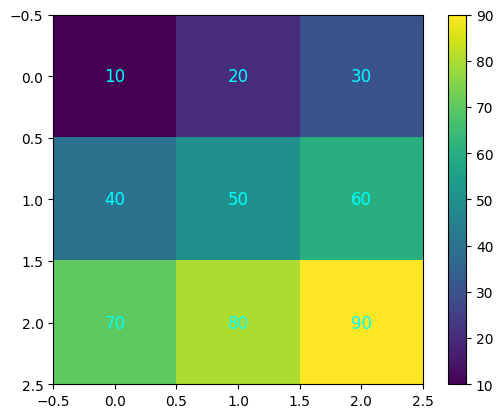

In [13]:
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]) # array con todas las celdas

number_of_rows = len(data) // number_of_columns
data = data.reshape((number_of_rows, number_of_columns))
plt.imshow(data, interpolation='nearest')
plt.colorbar()
rows, cols = data.shape
for i in range(rows):
    for j in range(cols):
        plt.text(j, i, str(data[i, j]), ha='center', va='center', color='cyan', fontsize=12)
plt.show()

In [ ]:
# Ejemplo de arrays
neighbor_indices = np.array([-1, 9, 3, -1])
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) # array con todas las celdas
print(f"data: {data}")

print(f"neighbor_indices: {neighbor_indices}")  # → [-1, 9, 3, -1]
mask = neighbor_indices != -1       # → [False,  True,  True, False]
print(f"mask: {mask}")
valid_positions = np.where(neighbor_indices != -1)[0]
print(f"valid_positions: {valid_positions}")  # con esto habría que elegir de la q-table

corresponding_indices = neighbor_indices[mask]       # cuando se elija el índice de la q-table, la celda con este índice será el próximo estado
print(f"corresponding_indices: {corresponding_indices}")
result = data[corresponding_indices]                 # → [100, 40]
print(f"corresponding array values: {result}")

data: [ 10  20  30  40  50  60  70  80  90 100]
neighbor_indices: [-1  9  3 -1]
mask: [False  True  True False]
valid_positions: [1 2]
corresponding_indices: [9 3]
corresponding array values: [100  40]


## **Without toroidal wrapping**

In [18]:
array_1d = np.arange(20)
array_1d = array_1d * 20
n_rows = 4
n_cols = 5
aux_matrix = array_1d.reshape(n_rows, n_cols)
print(aux_matrix)

index_to_select = 4
print(f"Index selected: {index_to_select}")
print(f"Value at index {index_to_select}: {array_1d[index_to_select]}")

cell_row = index_to_select // n_cols
cell_col = index_to_select % n_cols
above_idx = (cell_row - 1) * n_cols + cell_col
below_idx = (cell_row + 1) * n_cols + cell_col
left_idx = cell_row * n_cols + (cell_col - 1)
right_idx = cell_row * n_cols + (cell_col + 1)

neighbor_indices = [above_idx, below_idx, left_idx, right_idx]
print("Neighbor indices:", neighbor_indices)

for i, idx in enumerate(neighbor_indices.copy()):
    # Check if index is within valid range
    if idx < 0 or idx >= array_1d.size:
        neighbor_indices[i] = -1  # Mark as invalid
        continue

    # For horizontal neighbors, ensure they remain in the same row as 'index_to_select'
    neighbor_row = idx // n_cols
    if abs(idx - index_to_select) == 1 and neighbor_row != cell_row:
        neighbor_indices[i] = -1  # Mark as invalid

neighbor_indices = np.array(neighbor_indices)
print("All neighbor indices:", neighbor_indices)
print("Valid neighbor indices:", neighbor_indices[neighbor_indices != -1])
# print("valid 'cells':", array_1d)
# print("Max cell value:", np.max(array_1d[neighbor_indices]))

[[  0  20  40  60  80]
 [100 120 140 160 180]
 [200 220 240 260 280]
 [300 320 340 360 380]]
Index selected: 4
Value at index 4: 80
Neighbor indices: [-1, 9, 3, 5]
All neighbor indices: [-1  9  3 -1]
Valid neighbor indices: [9 3]


In [42]:
# Create a 5x4 numpy array with values 0 to 19
array_5x4 = np.arange(20).reshape(5, 4)
print(array_5x4)

# Define which row and the list of column indices you want to extract
row_index = 0  # you can change this to any valid row index (0 to 4)
col_indices = [1, 3]  # example column indices
posibles = np.where(array_5x4[row_index] != 0)[0]
print(posibles)

print(f"Values in row {row_index} at columns {col_indices}: {array_5x4[row_index, col_indices]}")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[1 2 3]
Values in row 0 at columns [1, 3]: [1 3]


## **Separate cells**

In [ ]:
epsilon_max = 1.0
epsilon_min = 0.01
epsilon_history = []
episodes = 100
for i in range(episodes):
    # Use episodes-1 in the denominator to ensure epsilon_min is reached at the final episode
    epsilon = epsilon_min + 0.5 * (epsilon_max - epsilon_min) * (1 + np.cos(np.pi * i / (episodes - 1)))
    epsilon_history.append(epsilon)

def plot_epsilon_history(epsilon_history: list, file_name: str) -> None:
    """
    Plot the epsilon history during the training process.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(epsilon_history, label='Epsilon')
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon')
    plt.title('Epsilon vs Episodes')
    plt.legend()
    plt.savefig(file_name) # always in folder results
    plt.close()

plot_epsilon_history(epsilon_history, 'results/V3_version/epsilon_history.png')

In [25]:
q_table = np.loadtxt('results/V3_version/V3_1_Qtable_585_100.txt')

print(f"Total number of values in q_table: {q_table.size}")

num_zeros = np.count_nonzero(q_table == 0)
print(f"Number of zeros in q_table: {num_zeros}")

num_neg_ones = np.count_nonzero(q_table == -1)
print(f"Number of -1 in q_table: {num_neg_ones}")

percentage_zeros = (num_zeros / q_table.size) * 100
print(f"Percentage of zeros in q_table: {percentage_zeros:.2f}%")
print("*"*50)

# Get unique values and their counts
unique_values, counts = np.unique(q_table, return_counts=True)

# Create a list of tuples (value, count) and sort it by count in descending order
value_counts = sorted(zip(unique_values, counts), key=lambda x: x[1], reverse=True)

# Get the top 10 most repeated values and their counts
top_10_values = value_counts[:10]

print("Top 10 most repeated values and their counts:")
for value, count in top_10_values:
    print(f"Value: {value}, Count: {count}")

# Calculate the sum of counts of the top 10 most repeated values
sum_top_10_counts = sum(count for _, count in top_10_values)
print(f"Sum of counts of the top 10 most repeated values: {sum_top_10_counts}")
print("*"*50)

num_positive_values = np.count_nonzero(q_table > 0)
print(f"Number of positive values in q_table: {num_positive_values}")

# Get unique positive values and their counts
unique_values, counts = np.unique(q_table[q_table > 0], return_counts=True)

# Create a list of tuples (value, count) and sort it by count in descending order
value_counts = sorted(zip(unique_values, counts), key=lambda x: x[1], reverse=True)

# Get the top 10 most repeated positive values and their counts
top_10_positive_values = value_counts[:10]

print("Top 10 most repeated positive values and their counts")
for value, count in sorted(top_10_positive_values, reverse=True):
    print(f"Value: {value}, Count: {count}")

Total number of values in q_table: 342225
Number of zeros in q_table: 291003
Number of -1 in q_table: 0
Percentage of zeros in q_table: 85.03%
**************************************************
Top 10 most repeated values and their counts:
Value: 0.0, Count: 291003
Value: nan, Count: 48863
Value: -0.01, Count: 1583
Value: -inf, Count: 523
Value: 0.15, Count: 253
Sum of counts of the top 10 most repeated values: 342225
**************************************************
Number of positive values in q_table: 253
Top 10 most repeated positive values and their counts
Value: 0.15, Count: 253


In [2]:
# Read lists from a txt file
with open('../../results/data.txt', 'r') as f:
    lines = f.readlines()
    rewards = eval(lines[0].split(': ')[1])
    max_rewards = eval(lines[1].split(': ')[1])
    actions_done = eval(lines[2].split(': ')[1])
    min_actions_done = eval(lines[3].split(': ')[1])
    areas_scratched = eval(lines[4].split(': ')[1])
    min_areas_scratched = eval(lines[5].split(': ')[1])

# # Save lists to a txt file
# with open('results/data.txt', 'w') as f:
#     f.write(f"rewards: {rewards}\n")
#     f.write(f"max_rewards: {max_rewards}\n")
#     f.write(f"actions_done: {actions_done}\n")
#     f.write(f"min_actions_done: {min_actions_done}\n")
#     f.write(f"areas_scratched: {areas_scratched}\n")
#     f.write(f"min_areas_scratched: {min_areas_scratched}\n")